   1. Age 2. Gender 3. Region 4. Job 5. Visited_Yeosu 6. Tourism_Info_Source  \
0     40대        여성        기타    직장인            3년 이상                   여행 앱   
1  50대 이상        남성        경상    직장인            처음 방문                 인터넷 검색   
2     30대        남성        서울    자영업            3년 이상                     기타   
3  50대 이상        여성        인천     기타            3년 이상                   여행 앱   
4  50대 이상        여성        제주     학생            3년 이상                     기타   

  7. Stay_Duration 8. Main_Activity 9. Main_Tourist_Spot 10. Last_Visit  ...  \
0            6일 이상           관광지 방문             여수해상케이블카         6개월 미만  ...   
1               1일               기타                 돌산대교          2년 이상  ...   
2            6일 이상          자연경관 감상                  오동도          1년~2년  ...   
3               1일          자연경관 감상             여수해상케이블카          2년 이상  ...   
4             4~5일          자연경관 감상                 돌산대교         6개월~1년  ...   

  19. Follow-up Service 20. Follow-up 

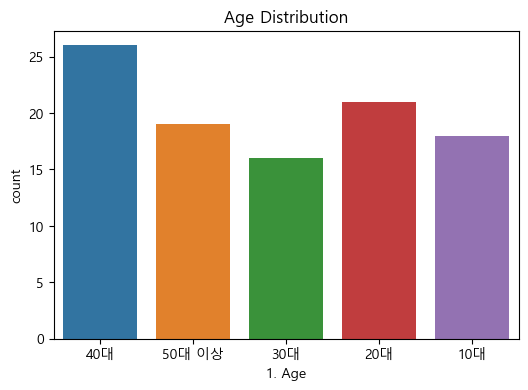

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn 라이브러리 불러오기
import matplotlib.font_manager as fm

# CSV 파일 불러오기
file_path = 'tourism_survey_28_questions_random_100.csv'
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 나이 분포 예시 그래프
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='1. Age')
plt.title('Age Distribution')
plt.savefig('age_distribution_high_res.png', dpi=300)
plt.show()


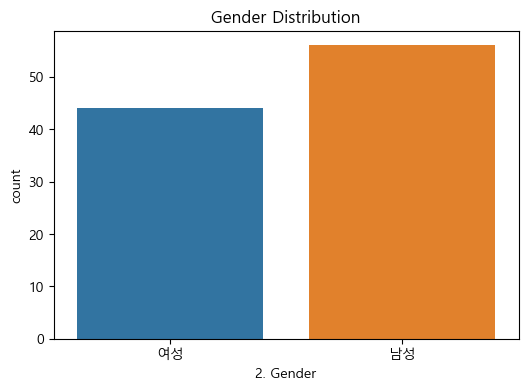

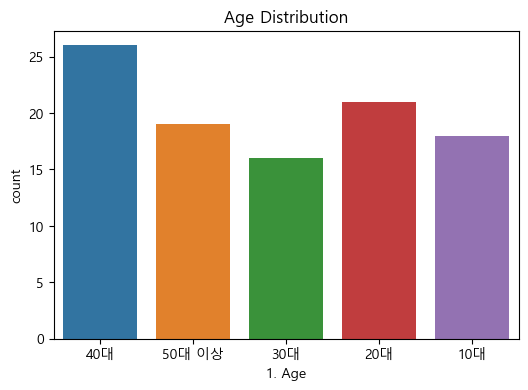

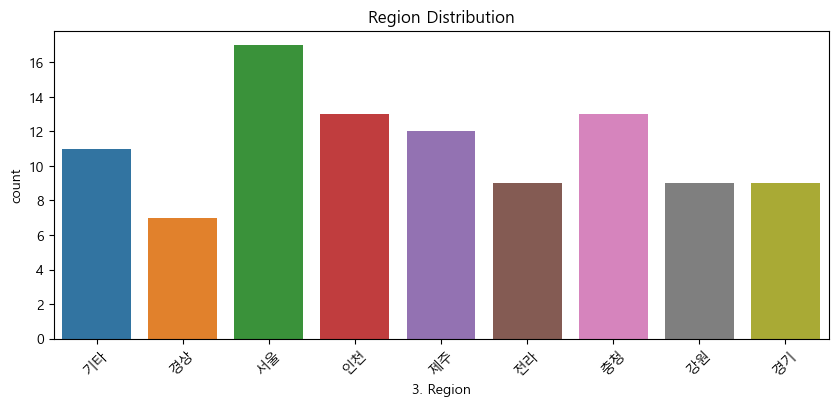

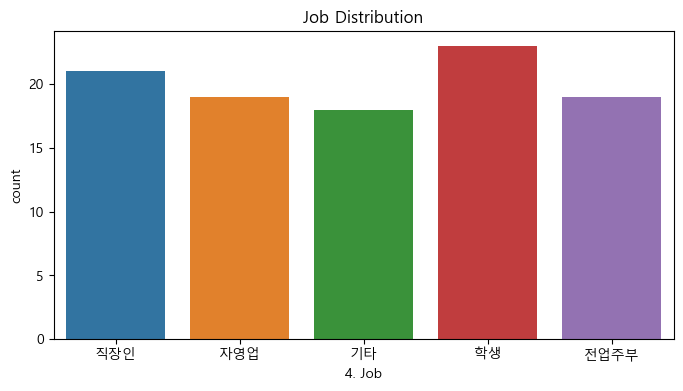

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 성별 분포
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='2. Gender')
plt.title('Gender Distribution')
plt.savefig('gender_distribution.png')
plt.show()

# 나이 분포
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='1. Age')
plt.title('Age Distribution')
plt.savefig('age_distribution.png')
plt.show()

# 지역 분포
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='3. Region')
plt.title('Region Distribution')
plt.xticks(rotation=45)
plt.savefig('region_distribution.png')
plt.show()

# 직업 분포
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='4. Job')
plt.title('Job Distribution')
plt.savefig('job_distribution.png')
plt.show()


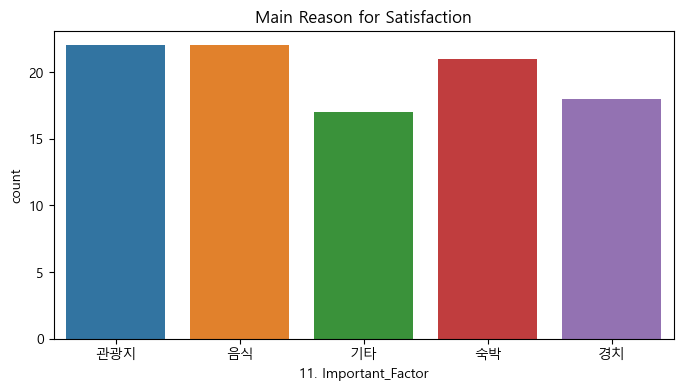

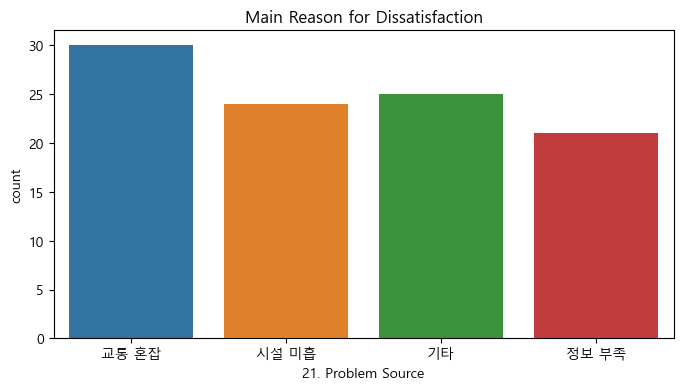

In [8]:
# 만족한 주된 이유 (11번 문항)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='11. Important_Factor')
plt.title('Main Reason for Satisfaction')
plt.savefig('main_reason_satisfaction.png')
plt.show()

# 불만족한 주된 이유 (21번 문항)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='21. Problem Source')
plt.title('Main Reason for Dissatisfaction')
plt.savefig('main_reason_dissatisfaction.png')
plt.show()


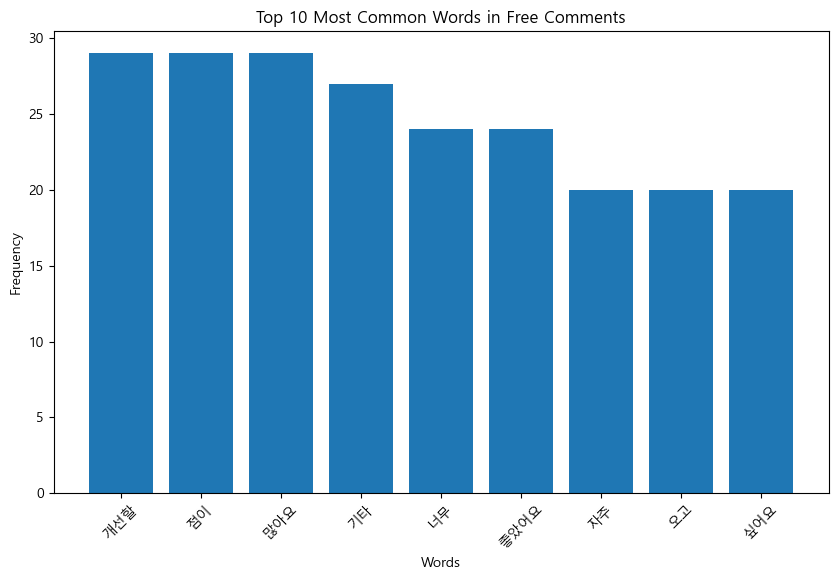

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# 주관식 응답 키워드 추출
comments = df['28. Free Comments']

# 모든 주관식 응답을 하나의 문자열로 합치기
all_comments = " ".join(comments)

# 단어 빈도수 카운팅
word_count = Counter(all_comments.split())

# 총 단어 수 계산
total_words = sum(word_count.values())

# 상위 10개의 가장 자주 등장하는 단어와 비율
common_words = word_count.most_common(10)
words, counts = zip(*common_words)

# 비율 계산
word_ratios = [count / total_words * 100 for count in counts]

# 단어 비율 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(words, word_ratios)
plt.title('Top 10 Most Common Words in Free Comments (Percentage)')
plt.xlabel('Words')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


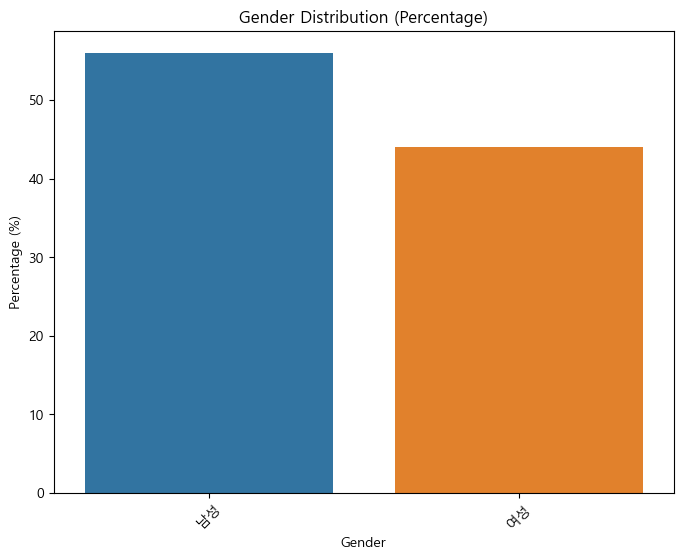

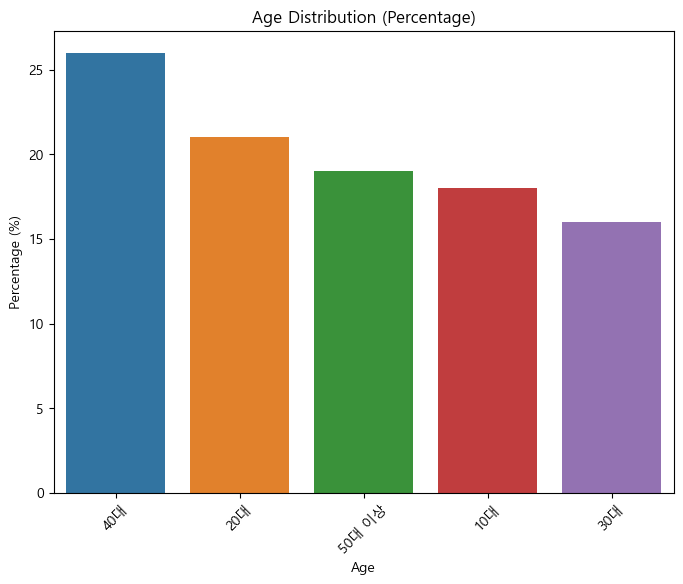

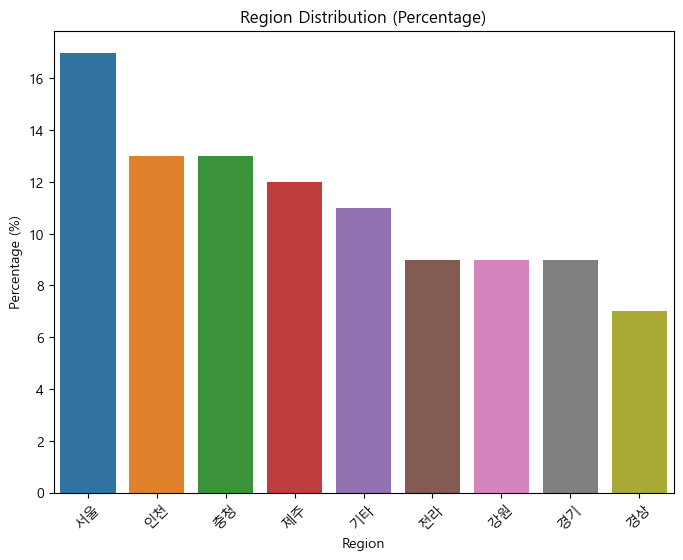

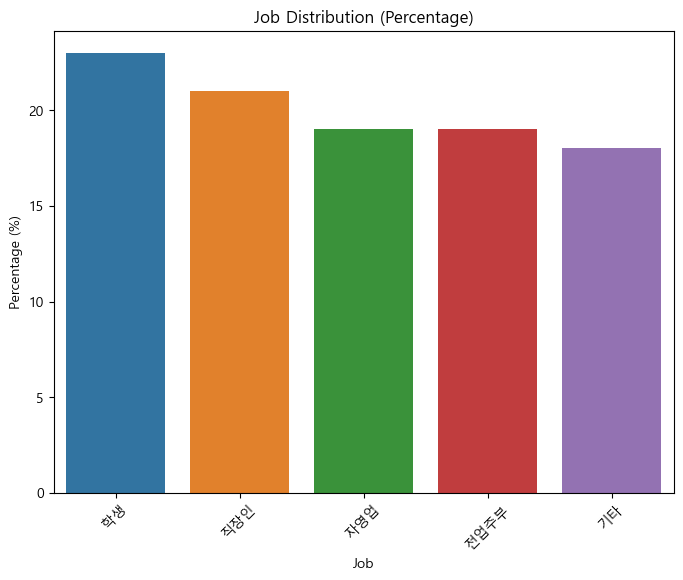

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 불러오기
file_path = 'tourism_survey_28_questions_random_100.csv'
df = pd.read_csv(file_path)

# 응답 수
total_responses = len(df)

# 비율을 계산하는 함수
def plot_percentage(column_name, title, xlabel):
    counts = df[column_name].value_counts()
    percentages = (counts / total_responses) * 100
    plt.figure(figsize=(8, 6))
    sns.barplot(x=percentages.index, y=percentages.values)
    plt.title(f'{title} (Percentage)')
    plt.xlabel(xlabel)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()

# 성별 분포 (비율)
plot_percentage('2. Gender', 'Gender Distribution', 'Gender')

# 나이 분포 (비율)
plot_percentage('1. Age', 'Age Distribution', 'Age')

# 지역 분포 (비율)
plot_percentage('3. Region', 'Region Distribution', 'Region')

# 직업 분포 (비율)
plot_percentage('4. Job', 'Job Distribution', 'Job')


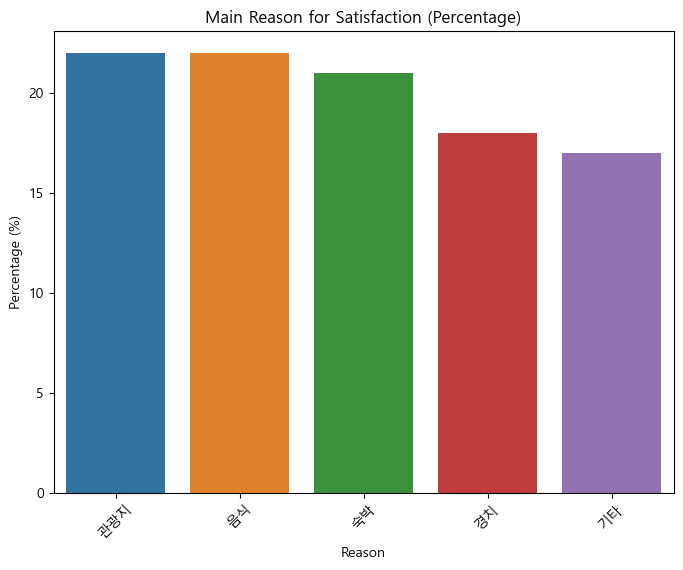

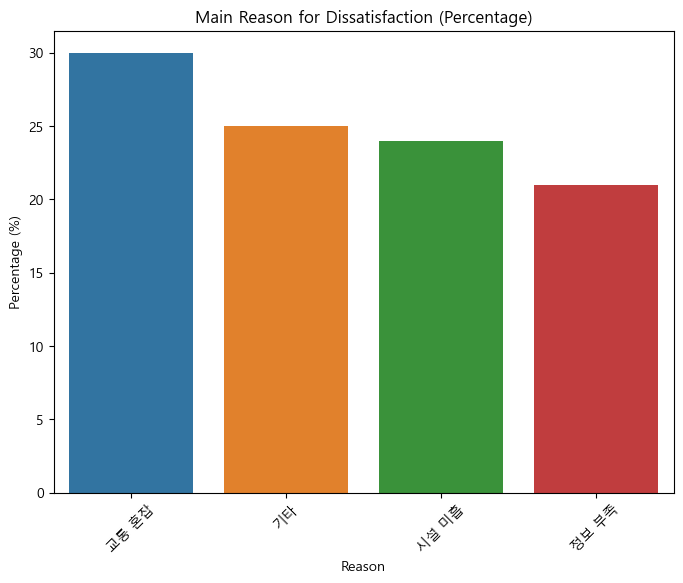

In [12]:
# 만족한 주된 이유 (비율)
plot_percentage('11. Important_Factor', 'Main Reason for Satisfaction', 'Reason')

# 불만족한 주된 이유 (비율)
plot_percentage('21. Problem Source', 'Main Reason for Dissatisfaction', 'Reason')


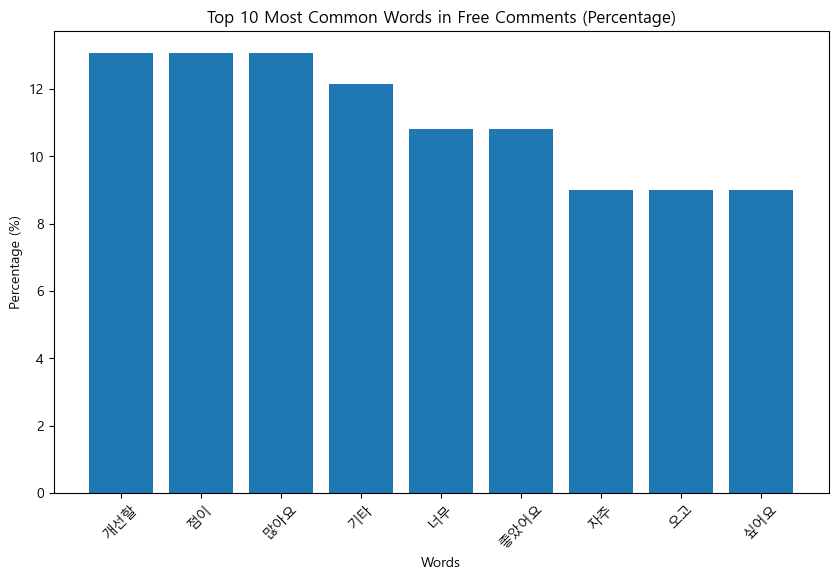

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

# 주관식 응답 키워드 추출
comments = df['28. Free Comments']

# 모든 주관식 응답을 하나의 문자열로 합치기
all_comments = " ".join(comments)

# 단어 빈도수 카운팅
word_count = Counter(all_comments.split())

# 총 단어 수 계산
total_words = sum(word_count.values())

# 상위 10개의 가장 자주 등장하는 단어와 비율
common_words = word_count.most_common(10)
words, counts = zip(*common_words)

# 비율 계산
word_ratios = [count / total_words * 100 for count in counts]

# 단어 비율 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(words, word_ratios)
plt.title('Top 10 Most Common Words in Free Comments (Percentage)')
plt.xlabel('Words')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# CSV 파일 불러오기
file_path = 'tourism_survey_28_questions_random_100.csv'
df = pd.read_csv(file_path)

# 1. 데이터 전처리
# 14번 문항: 만족도를 예측할 목표 변수로 설정
satisfaction_mapping = {'매우 만족': 5, '만족': 4, '보통': 3, '불만족': 2, '매우 불만족': 1}
df['14. Satisfaction'] = df['14. Satisfaction'].map(satisfaction_mapping)

# 범주형 데이터를 수치형으로 변환 (Label Encoding)
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = encoder.fit_transform(df[column])

# 2. 훈련/테스트 데이터 분리
X = df.drop('14. Satisfaction', axis=1)  # 특징 데이터
y = df['14. Satisfaction']  # 목표 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 랜덤 포레스트 모델 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. 예측
y_pred = rf_model.predict(X_test)

# 5. 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 예측값과 실제값 비교
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df.head())


Mean Squared Error: 2.2360750000000005
R-squared: -0.18310846560846583
    Actual  Predicted
83       5       2.94
53       2       3.03
70       3       3.15
45       3       3.61
44       4       3.28
